In [2]:
print(__doc__)

Automatically created module for IPython interactive environment


In [3]:
import matplotlib.pyplot as plt


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
X, y = load_breast_cancer(return_X_y=True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [10]:
clf = DecisionTreeClassifier(random_state=0)

In [11]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [12]:
pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test, pred)

0.8811188811188811

In [15]:
from sklearn import  tree

[Text(1561.0714285714287, 1026.8, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(996.4285714285714, 906.0, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(664.2857142857143, 785.2, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(398.57142857142856, 664.4, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(265.7142857142857, 543.6, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(132.85714285714286, 422.79999999999995, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(398.57142857142856, 422.79999999999995, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(265.7142857142857, 302.0, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(531.4285714285714, 302.0, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(398.57142857142856, 181.19999999999993, 'X[1] <= 22.385\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(265.7142857142857

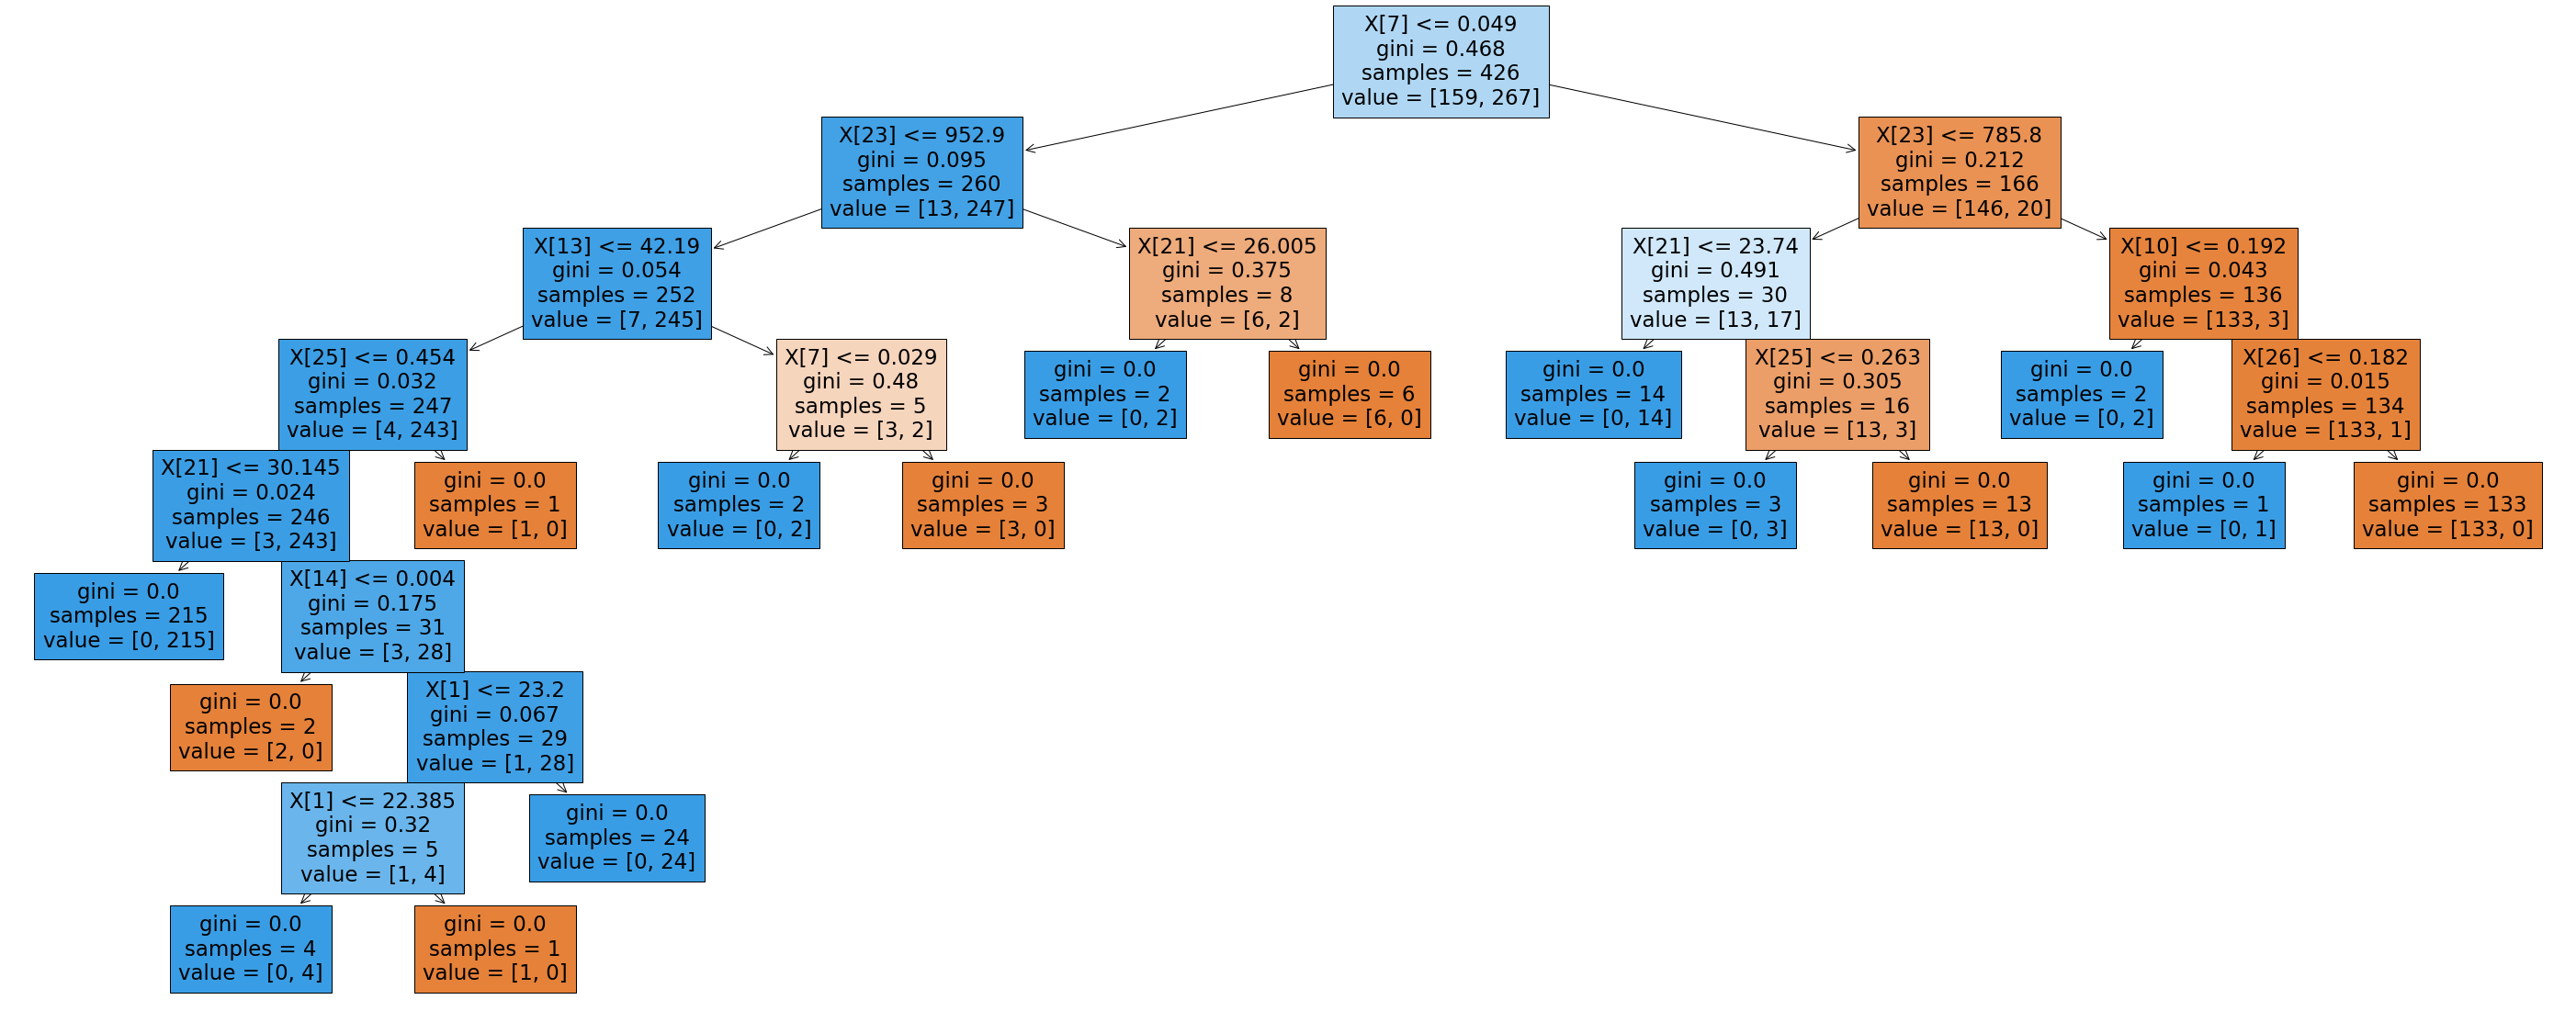

In [17]:
plt.figure(figsize=(50,20))
tree.plot_tree(clf,filled=True)

In [18]:
path = clf.cost_complexity_pruning_path(X_train, y_train)

In [19]:
ccp_alphas, impurities =  path.ccp_alphas, path.impurities

In [20]:
ccp_alphas, impurities

(array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]),
 array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352]))

In [21]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [22]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)
  

In [ ]:
clfs

In [24]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]

In [25]:
train_scores

[1.0,
 0.9976525821596244,
 0.9906103286384976,
 0.9882629107981221,
 0.9835680751173709,
 0.9788732394366197,
 0.9765258215962441,
 0.971830985915493,
 0.9647887323943662,
 0.9553990610328639,
 0.931924882629108,
 0.9225352112676056,
 0.6267605633802817]

In [26]:
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [27]:
test_scores

[0.8811188811188811,
 0.8881118881118881,
 0.916083916083916,
 0.916083916083916,
 0.916083916083916,
 0.9230769230769231,
 0.9300699300699301,
 0.9300699300699301,
 0.9370629370629371,
 0.916083916083916,
 0.916083916083916,
 0.8811188811188811,
 0.6293706293706294]

In [29]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

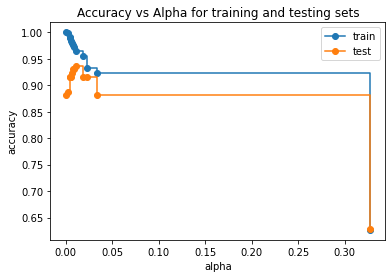

In [28]:
fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle = "steps-post")
ax.legend()
plt.show()

In [30]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01144366)

In [31]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01144366, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

In [32]:
pred = clf.predict(X_test)

In [33]:
accuracy_score(pred, y_test)

0.9300699300699301

[Text(558.0, 489.24, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(279.0, 380.52000000000004, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(139.5, 271.8, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(418.5, 271.8, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(837.0, 380.52000000000004, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(697.5, 271.8, 'X[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(558.0, 163.08000000000004, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(837.0, 163.08000000000004, 'X[25] <= 0.263\ngini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(697.5, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(976.5, 54.360000000000014, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(976.5, 271.8, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

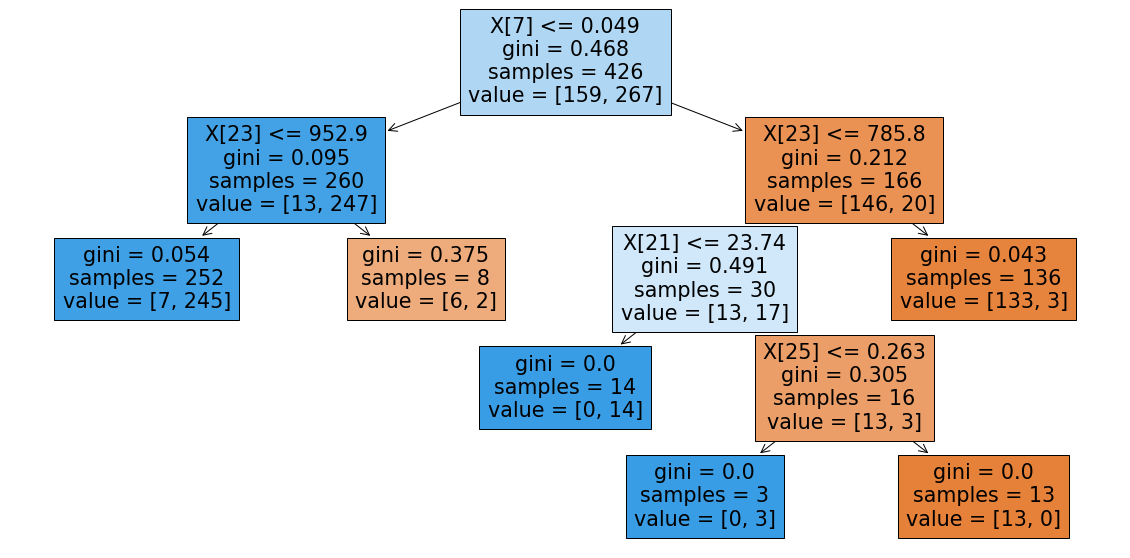

In [37]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf,filled=True)